In [1]:
%matplotlib widget

In [2]:
import torch

from PIL import Image
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionInpaintPipelineLegacy, DDIMScheduler, AutoencoderKL

from ip_adapter import IPAdapter

In [6]:
# base_model_path = "runwayml/stable-diffusion-v1-5"
base_model_path = "rupeshs/LCM-runwayml-stable-diffusion-v1-5"
vae_model_path = "stabilityai/sd-vae-ft-mse"
image_encoder_path = "models/image_encoder/"
ip_ckpt = "models/ip-adapter_sd15.bin"
device = "cuda"

In [4]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    
    grid = Image.new('RGB', size=(cols * w, rows * h))
    grid_w, grid_h = grid.size
    print(f"grid size: ({grid_h}, {grid_w})\n")
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))

    return grid

noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)
vae = AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)

## Image Variations

In [7]:
# load SD pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)

model_index.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/133 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt: 0.00B [00:00, ?B/s]

unet/config.json:   0%|          | 0.00/795 [00:00<?, ?B/s]

tokenizer/vocab.json: 0.00B [00:00, ?B/s]

tokenizer/added_tokens.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs-us-1.hf-mirror.com/repos/2d/c4/2dc4b83a11648e33f163c8c28e44a55f42acf1f451e070e7bfa857786146c136/354cea498825e9448cf95050277c18be6a4549f912c0e557683edd454f967e33?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27diffusion_pytorch_model.safetensors%3B+filename%3D%22diffusion_pytorch_model.safetensors%22%3B&Expires=1725878151&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNTg3ODE1MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzJkL2M0LzJkYzRiODNhMTE2NDhlMzNmMTYzYzhjMjhlNDRhNTVmNDJhY2YxZjQ1MWUwNzBlN2JmYTg1Nzc4NjE0NmMxMzYvMzU0Y2VhNDk4ODI1ZTk0NDhjZjk1MDUwMjc3YzE4YmU2YTQ1NDlmOTEyYzBlNTU3NjgzZWRkNDU0Zjk2N2UzMz9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=DMyW48mcm2Dc0gHojvzoAtJhRjW%7EjRuxn4441OFO1mySFqQZH31kMWNwb4FVXbPCOjiPkDaLcCuf3rfxWQUEZfDAQ3Rgq6Nu9f-h1%7E6gt0lfdwQtdM3inJXood2By5QR5fwwdI5Y%7EZNfs7tPSjivhAjBv7TIDZEVvFA4lsLdY1LYusMx8KzkmA695i095E0kU1TqA1

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


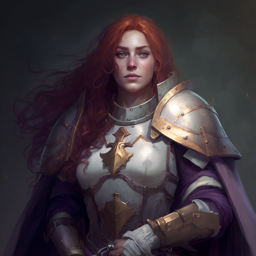

In [8]:
# read image prompt
image = Image.open("assets/images/woman.png")
image.resize((256, 256))

In [9]:
# load ip-adapter
ip_model = IPAdapter(pipe, image_encoder_path, ip_ckpt, device)

/home/cw/IP-Adapter/ip_adapter/ip_adapter.py:134: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(self.ip_ckpt, map_location="cpu")


  0%|          | 0/50 [00:00<?, ?it/s]

grid size: (512, 2048)



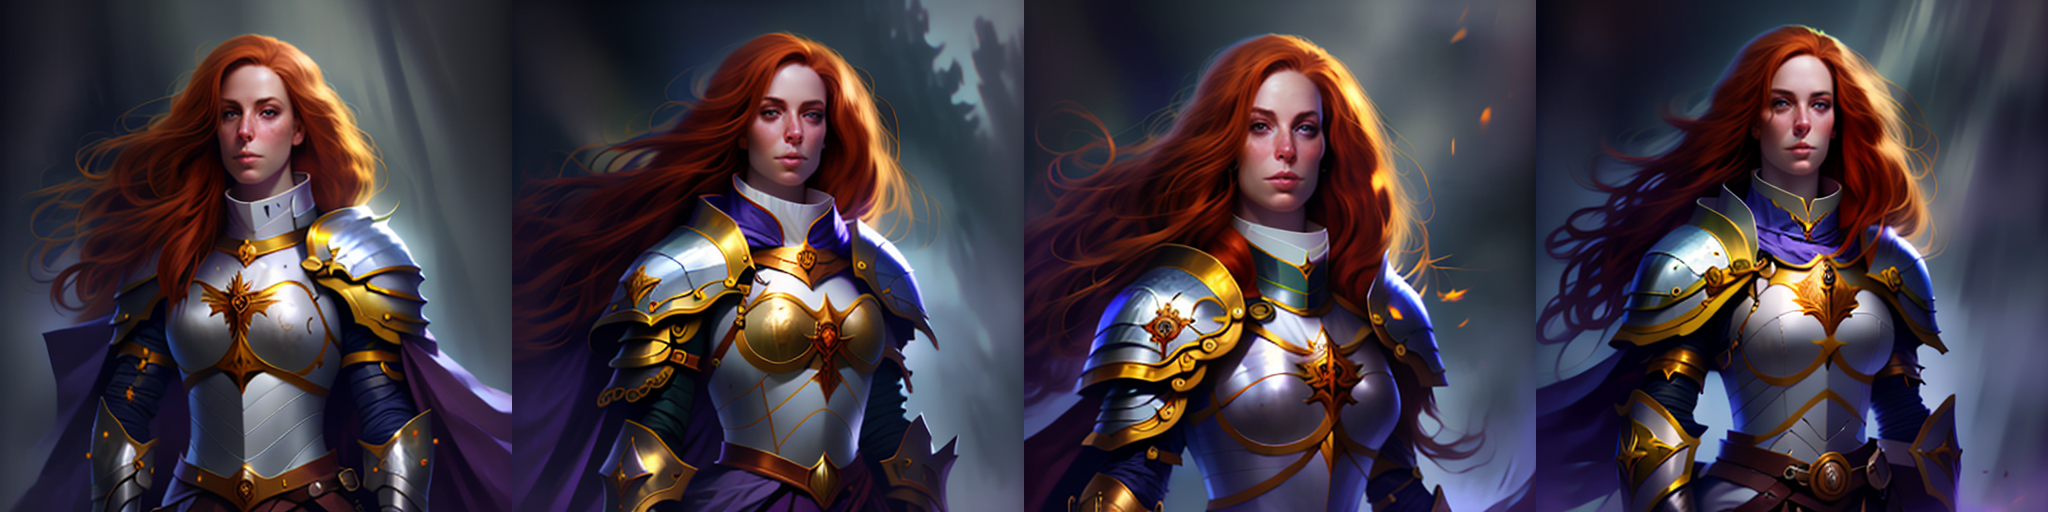

In [10]:
# generate image variations
images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42)
grid = image_grid(images, 1, 4)
grid

## Image-to-Image

In [12]:
# load SD Img2Img pipe
del pipe, ip_model
torch.cuda.empty_cache()

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


grid size: (256, 512)



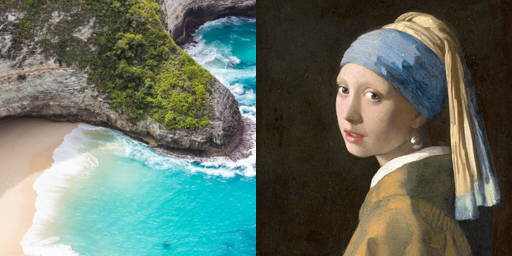

In [11]:
# read image prompt
image = Image.open("assets/images/river.png")
g_image = Image.open("assets/images/vermeer.jpg")
image_grid([image.resize((256, 256)), g_image.resize((256, 256))], 1, 2)

In [13]:
# load ip-adapter
ip_model = IPAdapter(pipe, image_encoder_path, ip_ckpt, device)

/home/cw/anaconda3/lib/python3.12/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:768: FutureWarning: You have passed 4 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/30 [00:00<?, ?it/s]

grid size: (512, 2048)



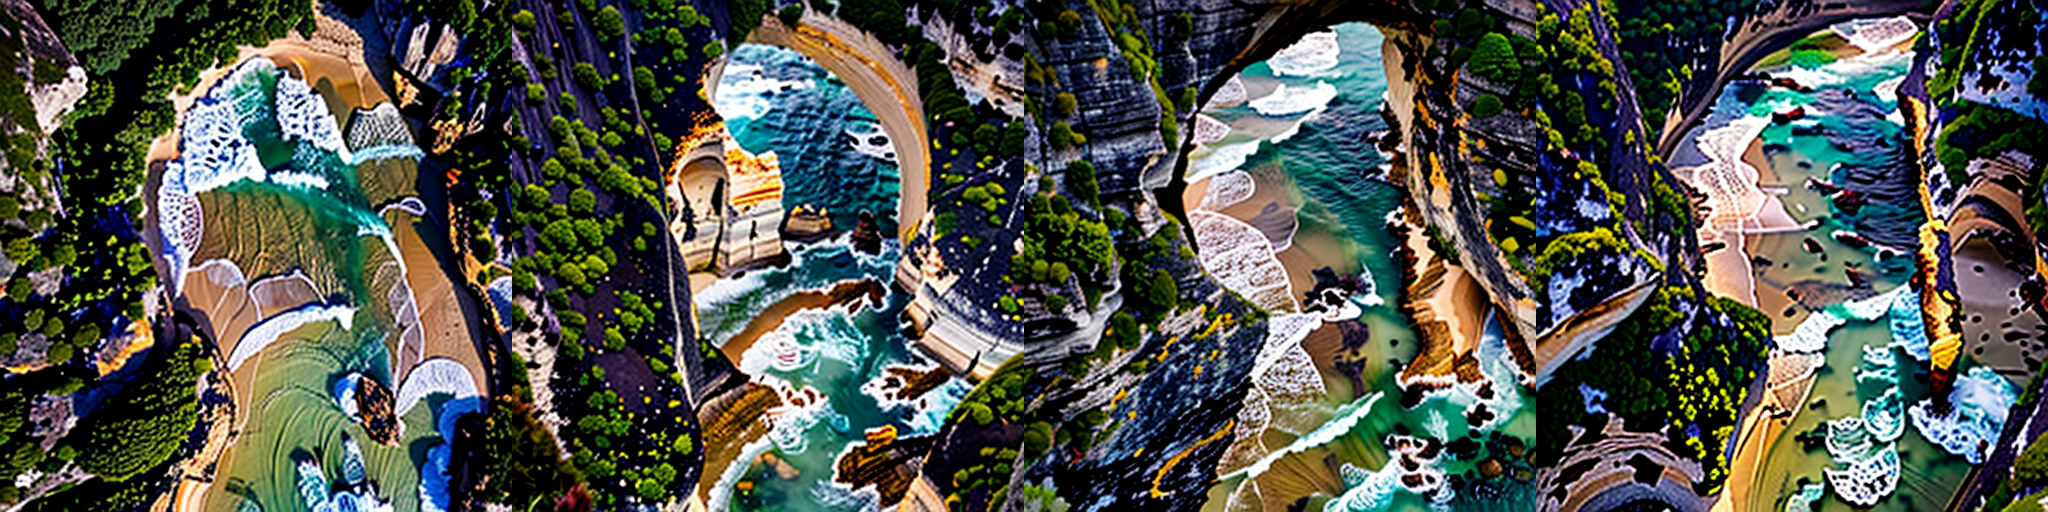

In [14]:
# generate
images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42, image=g_image, strength=0.6)
grid = image_grid(images, 1, 4)
grid

## Inpainting

In [15]:
# load SD Inpainting pipe
del pipe, ip_model
torch.cuda.empty_cache()

pipe = StableDiffusionInpaintPipelineLegacy.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/home/cw/anaconda3/lib/python3.12/site-packages/diffusers/pipelines/deprecated/stable_diffusion_variants/pipeline_stable_diffusion_inpaint_legacy.py:141: FutureWarning: The class <class 'diffusers.pipelines.deprecated.stable_diffusion_variants.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> is deprecated and will be removed in v1.0.0. You can achieve exactly the same functionalityby loading your model into `StableDiffusionInpaintPipeline` instead. See https://github.com/huggingface/diffusers/pull/3533for more information.
  deprecate("legacy is outdated", "1.0.0", deprecation_message, standard_warn=False)
You have disabled the safety checker for <class 'diffusers.pipelines.deprecated.stable_diffusion_variants.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or application

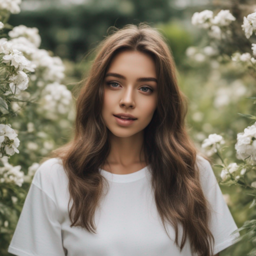

In [16]:
# read image prompt
image = Image.open("assets/images/girl.png")
image.resize((256, 256))

grid size: (384, 512)



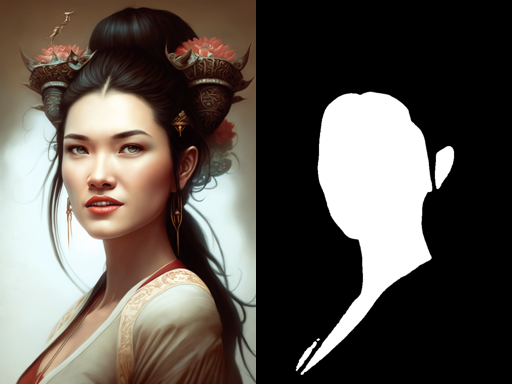

In [17]:
masked_image = Image.open("assets/inpainting/image.png").resize((512, 768))
mask = Image.open("assets/inpainting/mask.png").resize((512, 768))
image_grid([masked_image.resize((256, 384)), mask.resize((256, 384))], 1, 2)

In [18]:
# load ip-adapter
ip_model = IPAdapter(pipe, image_encoder_path, ip_ckpt, device)

  0%|          | 0/35 [00:00<?, ?it/s]

grid size: (768, 2048)



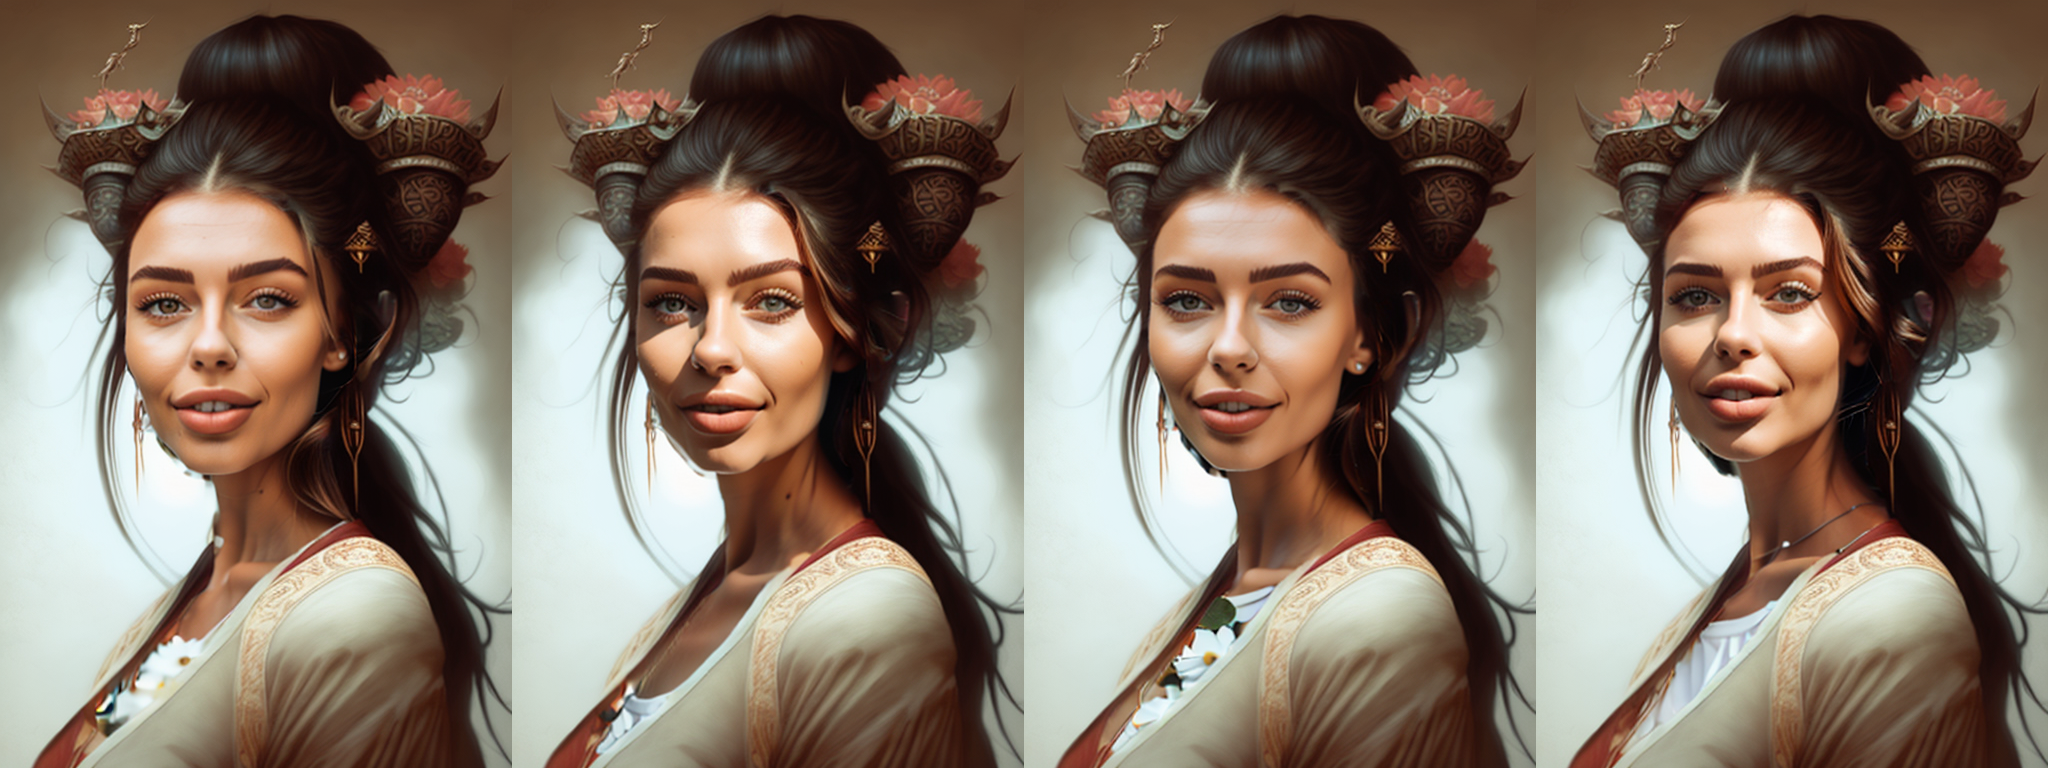

In [19]:
# generate
images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=50,
                           seed=42, image=masked_image, mask_image=mask, strength=0.7, )
grid = image_grid(images, 1, 4)
grid